In [1]:
from sklearn.datasets.samples_generator import make_blobs
x_raw,y_raw=make_blobs(n_samples=100,centers=2,cluster_std=5.2,random_state=42)

In [2]:
import numpy as np
X=x_raw.astype(np.float32)

In [3]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(sparse=False,dtype=np.float32)
y=enc.fit_transform(y_raw.reshape(-1,1))

C:\Users\Paul\Anaconda3\envs\opencv\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [4]:
import cv2
mlp=cv2.ml.ANN_MLP_create()

In [5]:
n_input=2
n_hidden=10
n_output=2
mlp.setLayerSizes(np.array([n_input,n_hidden,n_output]))

In [6]:
mlp.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM,2.5,1.0)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

Text(0, 0.5, 'y')

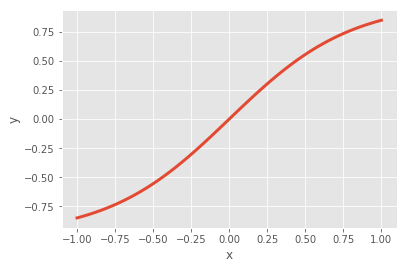

In [8]:
alpha=2.5
beta=1.0
x_sig=np.linspace(-1.0,1.0,100)
y_sig=beta*(1.0-np.exp(-alpha*x_sig))
y_sig/=(1+np.exp(-alpha*x_sig))
plt.plot(x_sig,y_sig,linewidth=3)
plt.xlabel('x')
plt.ylabel('y')

In [9]:
mlp.setTrainMethod(cv2.ml.ANN_MLP_BACKPROP)

In [10]:
term_mode=cv2.TERM_CRITERIA_MAX_ITER+cv2.TERM_CRITERIA_EPS
term_max_iter=300
term_eps=0.01
mlp.setTermCriteria((term_mode,term_max_iter,term_eps))

In [11]:
mlp.train(X,cv2.ml.ROW_SAMPLE,y)

True

In [12]:
_,y_hat=mlp.predict(X)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_hat.round(),y)

0.85

In [14]:
def plot_decision_boundary(classifier,x_test,y_test):
                 #create a mesh to plot in 
    h=0.02   #step size in mesh
    x_min,x_max=x_test[:,0].min()-1,x_test[:,0].max()+1
    y_min,y_max=x_test[:,1].min()-1,x_test[:,1].max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    x_hypo=np.c_[xx.ravel().astype(np.float32),yy.ravel().astype(np.float32)]
    _,zz=classifier.predict(x_hypo)
    zz=np.argmax(zz,axis=1)
    zz=zz.reshape(xx.shape)
    
    plt.contourf(xx,yy,zz,cmap=plt.cm.coolwarm,alpha=0.8)
    plt.scatter(x_test[:,0],x_test[:,1],c=y_test,s=100)

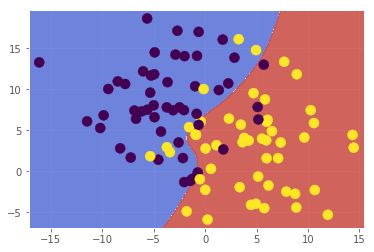

In [15]:
plot_decision_boundary(mlp,X,y_raw)